# MacParland SA. et al. Human Liver (10X)

## Reference:    
[MacParland SA, Liu JC, Ma XZ, Innes BT et al. Single cell RNA sequencing of human liver reveals distinct intrahepatic macrophage populations. Nat Commun 2018 Oct 22;9(1):4383.](https://www.ncbi.nlm.nih.gov/pubmed/30348985)

## GEO:    
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE115469

In [1]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")

from SCCAF import *

Populating the interactive namespace from numpy and matplotlib


download counts

In [2]:
cts = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE115nnn/GSE115469/suppl/GSE115469_Data.csv.gz",\
                 index_col=0)

In [3]:
cts.head()

,P1TLH_AAACCTGAGCAGCCTC_1,P1TLH_AAACCTGTCCTCATTA_1,P1TLH_AAACCTGTCTAAGCCA_1,P1TLH_AAACGGGAGTAGGCCA_1,P1TLH_AAACGGGGTTCGGGCT_1,P1TLH_AAAGCAACAGTAAGAT_1,P1TLH_AAAGCAAGTCGCGTGT_1,P1TLH_AAAGCAAGTGTTTGTG_1,P1TLH_AAAGCAAGTTGATTCG_1,P1TLH_AAAGTAGCAGACGTAG_1,...,P5TLH_TTTCCTCTCAGTGTTG_1,P5TLH_TTTGCGCAGGATGGTC_1,P5TLH_TTTGCGCCAATGACCT_1,P5TLH_TTTGCGCCATCCTAGA_1,P5TLH_TTTGTCAGTCAGGACA_1,P5TLH_TTTGTCAGTGTTCTTT_1,P5TLH_TTTGTCAGTTTAGGAA_1,P5TLH_TTTGTCATCAGCTTAG_1,P5TLH_TTTGTCATCCACGCAG_1,P5TLH_TTTGTCATCGGCATCG_1
RP11-34P13.7,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
FO538757.2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AP006222.2,0.0,0.31476,0.0,0.0,0.0,0.0,0.0,0.504068,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.140429,0.0,0.0,0.0
RP4-669L17.10,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
RP5-857K21.4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [4]:
cts.shape

(20007, 8444)

In [5]:
df = pd.read_csv("MacParland_levels.csv", index_col=0)
dd = dict(zip(df.index, df['x']))
obs = pd.read_csv("MacParland_clusters.csv", index_col=0)

In [6]:
obs['cell'] = obs['res.0.8'].map(dd)

In [7]:
obs.head()

,total_counts,total_features,orig.ident,res.0.8,S.Score,G2M.Score,Phase,cell
P1TLH_AAACCTGAGCAGCCTC_1,2943,1427,P1TLH,12,0.046089,0.000349,S,LSECs
P1TLH_AAACCTGTCCTCATTA_1,10897,2522,P1TLH,17,-0.000357,0.009434,G2M,Cholangiocytes
P1TLH_AAACCTGTCTAAGCCA_1,1914,1018,P1TLH,12,0.012811,-0.056561,S,LSECs
P1TLH_AAACGGGAGTAGGCCA_1,5574,1798,P1TLH,10,-0.011324,-0.047102,G1,Macrophages
P1TLH_AAACGGGGTTCGGGCT_1,3700,1417,P1TLH,2,0.057467,-0.003861,S,ab T cells


In [8]:
ad = sc.AnnData(scipy.sparse.csr_matrix(cts.values.T))
ad.obs_names = cts.columns
ad.var_names = cts.index
ad = ad[ad.obs_names.isin(obs.index),:]
ad.obs = obs.loc[ad.obs_names]

In [9]:
df = pd.read_csv("MacParland_tsne.csv",index_col=0)

In [10]:
ad.obsm['X_tsne'] = df.values

... storing 'orig.ident' as categorical
... storing 'Phase' as categorical
... storing 'cell' as categorical


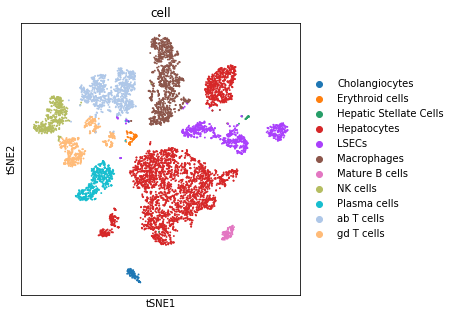

In [11]:
ad.uns['cell_colors'] = default_20

figsize(5,5)
sc.pl.tsne(ad, color='cell')

In [12]:
ad.raw = sc.pp.log1p(ad,copy=True)

In [13]:
ad.shape

(8444, 20007)

In [14]:
ad.write("../write/MacParland2018Liver.h5")

In [2]:
ad = sc.read("../write/MacParland2018Liver.h5")

In [15]:
ad.X

<8444x20007 sparse matrix of type '<class 'numpy.float32'>'
	with 11085818 stored elements in Compressed Sparse Row format>

# End